## Link al notebook con las celdas de python para la resolucion de los ejercicios
https://github.com/JesuaVAlc/Deberes-Metodos-Numericos/blob/main/Tarea10_JesuaVillacis.ipynb

**1.**Realice las siguientes multiplicaciones matriz-matriz:

**a)**
\begin{align*}
\begin{bmatrix}
2 & -3 \\
3 & -1
\end{bmatrix}
\begin{bmatrix}
1 & 5 \\
2 & 0
\end{bmatrix}
\end{align*}


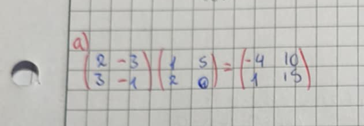

**b)**
\begin{align*}
\begin{bmatrix}
2 & -3 \\
3 & -1
\end{bmatrix}
\begin{bmatrix}
1 & 5 &-4\\
-3 & 2 & 0
\end{bmatrix}
\end{align*}


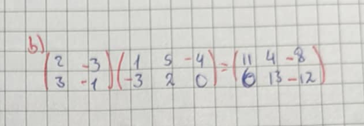

**c)**
\begin{align*}
\begin{bmatrix}
2 & -3 &1\\
4 & 3 & 0\\
5 &2 &-4
\end{bmatrix}
\begin{bmatrix}
0 & 1 & -2\\
1 & 0 & -1\\
2 & 3 & -2
\end{bmatrix}
\end{align*}


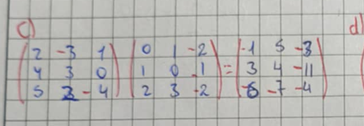

**d)**
\begin{align*}
\begin{bmatrix}
2 & 1 &2\\
-2 & 3 & 0\\
2 & -1 & 3
\end{bmatrix}
\begin{bmatrix}
1 & -2 \\
-4 & 1\\
0 & 2
\end{bmatrix}
\end{align*}


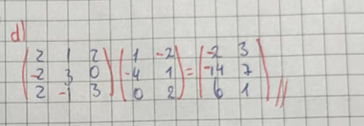

**2.** Determine cuáles de las siguientes matrices son no singulares y calcule la inversa de esas matrices:

**a)**
\begin{align*}
\begin{bmatrix}
4 & 2 &6\\
3 & 0 &7\\
-2 &-1 &-3
\end{bmatrix}
\end{align*}

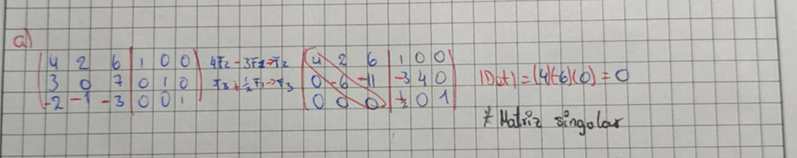

**b)**
\begin{align*}
\begin{bmatrix}
1 & 2 &0\\
2 & 1 &-1\\
3 & 1 &-1
\end{bmatrix}
\end{align*}

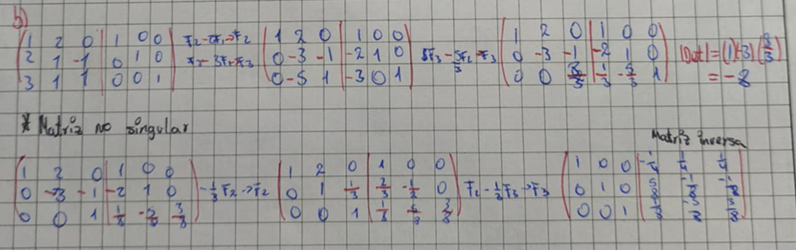

**c)**
\begin{align*}
\begin{bmatrix}
1 & 1 &-1 &1\\
1 & 2 &-4 & -2\\
2 &1 &1 &5\\
-1 & 0 &-2 &-4
\end{bmatrix}
\end{align*}

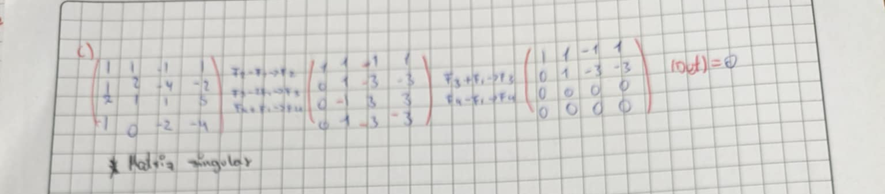

**d)**
\begin{align*}
\begin{bmatrix}
4 & 0 &0 &0\\
6 & 7 &0 & 0\\
9 & 11 &1 &0\\
5 & 4 &1 &1
\end{bmatrix}
\end{align*}

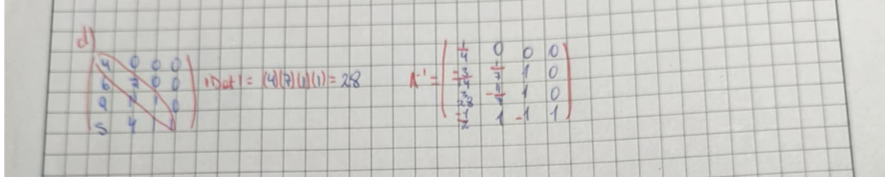

In [1]:
import numpy as np

In [20]:
def descomposicion_LU(A):
    """Devuelve L y U tal que A = LU, sin pivoteo."""
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy().astype(float)

    for i in range(n):
        for j in range(i+1, n):
            factor = U[j, i] / U[i, i]
            L[j, i] = factor
            U[j, :] -= factor * U[i, :]
    
    return L, U

def sustitucion_adelante(L, b):
    """Resuelve Ly = b para y."""
    n = L.shape[0]
    y = np.zeros_like(b, dtype=float)

    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])
    
    return y

def sustitucion_atras(U, y):
    """Resuelve Ux = y para x."""
    n = U.shape[0]
    x = np.zeros_like(y, dtype=float)

    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    
    return x

def resolver_LU(A, b):
    L, U = descomposicion_LU(A)
    y = sustitucion_adelante(L, b)
    x = sustitucion_atras(U, y)
    return x, L, U

**3.** Resuelva los sistemas lineales 4 x 4 que tienen la misma matriz de coeficientes:
\begin{align*}
x_{1} - x_{2} + 2 x_{3} - x_{4} = 6, & \quad x_{1} - x_{2} + 2 x_{3} - x_{4} = 1 \\
x_{1} - x_{3} + x_{4} = 4, & \quad x_{1} - x_{3} + x_{4} = 1 \\
2 x_{1} + x_{2} + 3 x_{3} - 4 x_{4} = -2, & \quad 2 x_{1} + x_{2} + 3 x_{3} - 4 x_{4} = 2 \\
- x_{2} + x_{3} - x_{4} = 5, & \quad - x_{2} + x_{3} - x_{4} = -1
\end{align*}


**4.** Encuentre los valores de A que hacen que la siguiente matriz sea singular.
\begin{align*}
A = 
\begin{bmatrix}
1 & -1 & \alpha \\
2 & 1 & 1 \\
0 & \alpha & -\frac{3}{2}
\end{bmatrix}\\
\end{align*}


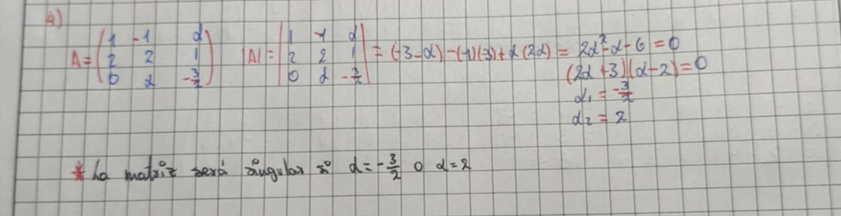

**5.** Resuelva los siguientes sistemas lineales:


In [21]:
def resolver_LU_Descompuesto(L, U, b):
    y = sustitucion_adelante(L, b)
    x = sustitucion_atras(U, y)
    return x

**a)**
\begin{align*}
\begin{bmatrix}
1 & 0 & 0 \\
2 & 1 & 0 \\
-1 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
2 & 3 & -1 \\
0 & -2 & 1 \\
0 & 0 & 3
\end{bmatrix}
\begin{bmatrix}
x_{1} \\ x_{2} \\ x_{3}
\end{bmatrix}
=
\begin{bmatrix}
2 \\ -1 \\ 1
\end{bmatrix}
\end{align*}


In [22]:
L= np.array([
    [1, 0, 0],
    [2, 1, 0],
    [-1, 0, 1]
], dtype=float)
U=np.array([
    [2, 3, -1],
    [0, -2, 2],
    [0, 0, 3]
], dtype=float)
b=np.array([2, -1, 1], dtype=float)

x= resolver_LU_Descompuesto(L, U, b)

print('Solución: ', x)

Solución:  [-3.75  3.5   1.  ]


**b)**
\begin{align*}
\begin{bmatrix}
2 & 0 & 0 \\
-1 & 1 & 0 \\
3 & 2 & -1
\end{bmatrix}
\begin{bmatrix}
1 & 1 & 1 \\
0 & 1 & 2 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x_{1} \\ x_{2} \\ x_{3}
\end{bmatrix}
=
\begin{bmatrix}
-1 \\ 3 \\ 0
\end{bmatrix}
\end{align*}


In [23]:
L= np.array([
    [1, 0, 0],
    [-1, 1, 0],
    [3, 2, -1]
], dtype=float)
U=np.array([
    [1, 1, 1],
    [0, 1, 2],
    [0, 0, 1]
], dtype=float)
b=np.array([-1, 3, 0], dtype=float)

x= resolver_LU_Descompuesto(L, U, b)

print('Solución: ', x)

Solución:  [-4.  4. -1.]


**6.** Factorice las siguientes matrices en la descomposición LU mediante el algoritmo de factorización LU
con lii = 1 para todas las i.

**a)**
\begin{align*}
\begin{bmatrix}
2 & -1 & 1 \\
3 & 3 & 9 \\
3 & 3 & 5
\end{bmatrix}
\end{align*}

In [10]:
A= np.array([
    [2, -1, 1],
    [3, 3, 9],
    [3, 3, 5]
], dtype=float)

L, U = descomposicion_LU(A)
print('L:\n', L)
print('U:\n', U)


L:
 [[1.  0.  0. ]
 [1.5 1.  0. ]
 [1.5 1.  1. ]]
U:
 [[ 2.  -1.   1. ]
 [ 0.   4.5  7.5]
 [ 0.   0.  -4. ]]


**b)**
\begin{align*}
\begin{bmatrix}
1.012 & -2.132 & 3.104 \\
-2.132 & 4.096 & -7.013 \\
3.104 & -7.013 & 0.014
\end{bmatrix}
\end{align*}

In [15]:
A2= np.array([
    [1.012, -2.132, 3.104],
    [-2.132, 4.096, -7.013],
    [3.104, -7.013, 0.014]
], dtype=float)

L2, U2 = descomposicion_LU(A2)
print('L:\n', L2)
print('U:\n', U2)

L:
 [[ 1.          0.          0.        ]
 [-2.10671937  1.          0.        ]
 [ 3.06719368  1.19775553  1.        ]]
U:
 [[ 1.012      -2.132       3.104     ]
 [ 0.         -0.39552569 -0.47374308]
 [ 0.          0.         -8.93914077]]


**c)**
\begin{align*}
\begin{bmatrix}
2 & 0 & 0 & 0 \\
1 & 1.5 & 0 & 0 \\
0 & -3 & 0.5 & 0 \\
2 & -2 & 1 & 1
\end{bmatrix}
\end{align*}

In [17]:
A3 = np.array([
    [2, 0, 0, 0],
    [1, 1.5, 0, 0],
    [0, -3, 0.5, 0],
    [2, -2, 1, 1]
], dtype=float)
L3, U3 = descomposicion_LU(A3)
print('L:\n', L3)
print('U:\n', U3)

L:
 [[ 1.          0.          0.          0.        ]
 [ 0.5         1.          0.          0.        ]
 [ 0.         -2.          1.          0.        ]
 [ 1.         -1.33333333  2.          1.        ]]
U:
 [[2.  0.  0.  0. ]
 [0.  1.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  1. ]]


**d)**
\begin{align*}
\begin{bmatrix}
2.1756 & 4.0231 & -2.1732 & 5.1967 \\
-4.0231 & 6.0000 & 0 & 1.1973 \\
-1.0000 & -5.2107 & 1.1111 & 0 \\
6.0235 & 7.0000 & 0 & -4.1561
\end{bmatrix}
\end{align*}

In [16]:
A4 = np.array([
    [2.1756, 4.0231, -2.1732, 5.1967],
    [-4.0231, 6.0000, 0, 1.1973],
    [-1.0000, -5.2107, 1.1111, 0],
    [6.0235, 7.0000, 0, -4.1561]
], dtype=float)

L4, U4 = descomposicion_LU(A4)
print('L:\n', L4)
print('U:\n', U4)

L:
 [[ 1.          0.          0.          0.        ]
 [-1.84919103  1.          0.          0.        ]
 [-0.45964332 -0.25012194  1.          0.        ]
 [ 2.76866152 -0.30794361 -5.35228302  1.        ]]
U:
 [[ 2.17560000e+00  4.02310000e+00 -2.17320000e+00  5.19670000e+00]
 [ 0.00000000e+00  1.34394804e+01 -4.01866194e+00  1.08069910e+01]
 [ 0.00000000e+00  4.44089210e-16 -8.92952394e-01  5.09169403e+00]
 [ 0.00000000e+00  2.37689114e-15  0.00000000e+00  1.20361280e+01]]


**7.** Modifique el algoritmo de eliminación gaussiana de tal forma que se pueda utilizar para resolver un sistema
lineal usando la descomposición LU y, a continuación, resuelva los siguientes sistemas lineales.

**a)**
\begin{gather*}
2 x_{1} - x_{2} + x_{3} = -1, \\
3 x_{1} + 3 x_{2} + 9 x_{3} = 0, \\
3 x_{1} + 3 x_{2} + 5 x_{3} = 4.
\end{gather*}

In [11]:
A1 = np.array([
    [2, -1, 1],
    [3, 3, 9],
    [3, 3, 5]
], dtype=float)

b1 = np.array([-1, 0, 4], dtype=float)

x1, L1, U1 = resolver_LU(A1, b1)
print('L:\n', L1)
print('U:\n', U1)
print('Solución: ', x1)


L:
 [[1.  0.  0. ]
 [1.5 1.  0. ]
 [1.5 1.  1. ]]
U:
 [[ 2.  -1.   1. ]
 [ 0.   4.5  7.5]
 [ 0.   0.  -4. ]]
Solución:  [ 1.  2. -1.]


**b)**
\begin{gather*}
1.012 x_{1} - 2.132 x_{2} + 3.104 x_{3} = 1.984, \\
-2.132 x_{1} + 4.096 x_{2} - 7.013 x_{3} = -5.049, \\
3.104 x_{1} - 7.013 x_{2} + 0.014 x_{3} = -3.895.
\end{gather*}

In [12]:
A2= np.array([
    [1.012, -2.132, 3.104],
    [-2.132, 4.096, -7.013],
    [3.104, -7.013, 0.014]
], dtype=float)

b2 = np.array([1.984, -5.049, -3.895], dtype=float)
x2, L2, U2 = resolver_LU(A2, b2)
print('L:\n', L2)
print('U:\n', U2)
print('Solución: ', x2)

L:
 [[ 1.          0.          0.        ]
 [-2.10671937  1.          0.        ]
 [ 3.06719368  1.19775553  1.        ]]
U:
 [[ 1.012      -2.132       3.104     ]
 [ 0.         -0.39552569 -0.47374308]
 [ 0.          0.         -8.93914077]]
Solución:  [1. 1. 1.]


**c)**
\begin{gather*}
2 x_{1} = 3, \\
x_{1} + 1.5 x_{3} = 4.5, \\
-3 x_{2} + 0.5 x_{3} = -6.6, \\
2 x_{1} - 2 x_{2} + x_{3} + x_{4} = 0.8.
\end{gather*}

In [13]:
A3 = np.array([
    [2, 0, 0, 0],
    [1, 1.5, 0, 0],
    [0, -3, 0.5, 0],
    [2, -2, 1, 1]
], dtype=float)

b3 = np.array([3, 4.5, -6.6, 0.8], dtype=float)
x3, L3, U3 = resolver_LU(A3, b3)
print('L:\n', L3)
print('U:\n', U3)
print('Solución: ', x3)

L:
 [[ 1.          0.          0.          0.        ]
 [ 0.5         1.          0.          0.        ]
 [ 0.         -2.          1.          0.        ]
 [ 1.         -1.33333333  2.          1.        ]]
U:
 [[2.  0.  0.  0. ]
 [0.  1.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  1. ]]
Solución:  [ 1.5  2.  -1.2  3. ]


**d)**
\begin{gather*}
2.1756 x_{1} + 4.0231 x_{2} - 2.1732 x_{3} + 5.1967 x_{4} = 17.102, \\
-4.0231 x_{1} + 6.0000 x_{2} + 1.1973 x_{4} = -6.1593, \\
-1.0000 x_{1} - 5.2107 x_{2} + 1.1111 x_{3} = 3.0004, \\
6.0235 x_{1} + 7.0000 x_{2} - 4.1561 x_{4} = 0.0000.
\end{gather*}

In [14]:
A4 = np.array([
    [2.1756, 4.0231, -2.1732, 5.1967],
    [-4.0231, 6.0000, 0, 1.1973],
    [-1.0000, -5.2107, 1.1111, 0],
    [6.0235, 7.0000, 0, -4.1561]
], dtype=float)

b4 = np.array([17.102, -6.1593, 3.0004, 0.0000], dtype=float)
x4, L4, U4 = resolver_LU(A4, b4)
print('L:\n', L4)
print('U:\n', U4)
print('Solución: ', x4)

L:
 [[ 1.          0.          0.          0.        ]
 [-1.84919103  1.          0.          0.        ]
 [-0.45964332 -0.25012194  1.          0.        ]
 [ 2.76866152 -0.30794361 -5.35228302  1.        ]]
U:
 [[ 2.17560000e+00  4.02310000e+00 -2.17320000e+00  5.19670000e+00]
 [ 0.00000000e+00  1.34394804e+01 -4.01866194e+00  1.08069910e+01]
 [ 0.00000000e+00  4.44089210e-16 -8.92952394e-01  5.09169403e+00]
 [ 0.00000000e+00  2.37689114e-15  0.00000000e+00  1.20361280e+01]]
Solución:  [2.9398512  0.0706777  5.67773512 4.37981223]
